# Applying Manova on Bowler data

In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA

# White ball data of Jadeja and yuzvendra Chahel

In [2]:
df=pd.read_csv('yuziwhite.csv')
df1=pd.read_csv('Raviwhite.csv')
df

,Unnamed: 0,Ground,Overs,Mdns,Wkts,Econ,Conceeded,Average,strike rate,Inns
0,0,2015,0.0,0,0,0.00,0,0.00,0.00,0
1,1,2016,36.0,4,9,5.37,166,18.44,24.00,6
2,2,2017,162.3,6,44,6.23,925,21.02,22.13,24
3,3,2018,207.7,3,47,6.26,1165,24.79,26.51,30
4,4,2019,176.6,0,37,7.12,1129,30.51,28.64,25
5,5,2020,74.0,1,14,8.41,582,41.57,31.71,13
6,6,2021,40.0,1,10,7.31,266,26.60,24.00,7
7,7,2022,172.3,0,44,6.96,1105,25.11,23.50,32


In [8]:
df.rename(columns = {'strike rate':'StrikeRate'}, inplace = True)
df1.rename(columns = {'strike rate':'StrikeRate'}, inplace = True)
df.rename(columns={'Ground':'Year'},inplace=True)
df1.rename(columns={'Ground':'Year'},inplace=True)

In [9]:
df=df[['Wkts','Mdns','Year','Average','StrikeRate']]
df1=df1[['Wkts','Mdns','Year','Average','StrikeRate']]

In [10]:
df2=pd.concat([df,df1],axis=0,ignore_index=True)
df2

,Wkts,Mdns,Year,Average,StrikeRate
0,0,0,2015,0.00,0.00
1,9,4,2016,18.44,24.00
2,44,6,2017,21.02,22.13
3,47,3,2018,24.79,26.51
4,37,0,2019,30.51,28.64
5,14,1,2020,41.57,31.71
6,10,1,2021,26.60,24.00
7,44,0,2022,25.11,23.50
8,10,0,2015,49.50,54.54
9,20,1,2016,33.50,32.10


Applying a MANOVA (Multivariate Analysis of Variance) to player data, where the dependent variables are 'Average' and 'Strike Rate,' and 'Player' is the independent variable.

In [14]:
df2['Player']=['Yuzvendra Chahal','Yuzvendra Chahal','Yuzvendra Chahal','Yuzvendra Chahal','Yuzvendra Chahal','Yuzvendra Chahal','Yuzvendra Chahal','Yuzvendra Chahal','Ravindra Jadeja','Ravindra Jadeja','Ravindra Jadeja','Ravindra Jadeja','Ravindra Jadeja','Ravindra Jadeja','Ravindra Jadeja','Ravindra Jadeja']


df2=df2[['Year','Average','StrikeRate','Player']]


In [38]:
from statsmodels.multivariate.manova import MANOVA
fit = MANOVA.from_formula('Average+StrikeRate~ Player', data=df2)
print(fit.mv_test())

                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.1619 2.0000 13.0000 33.6571 0.0000
         Pillai's trace 0.8381 2.0000 13.0000 33.6571 0.0000
 Hotelling-Lawley trace 5.1780 2.0000 13.0000 33.6571 0.0000
    Roy's greatest root 5.1780 2.0000 13.0000 33.6571 0.0000
------------------------------------------------------------
                                                            
------------------------------------------------------------
         Player         Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.5837 2.0000 13.0000  4.6361 0.0302
         Pillai's trace 0.4163 2.0000 13.0000  4.6361 0.0302
 Hotelling-Lawley trace 0.7132 2.0000 13.0

In [ ]:
maov = MANOVA.from_formula(formula='Average_x + Wkts_x Average_y + Wkts_y', data=df)
print(maov.mv_test())
df['']

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Wkts', ylabel='Density'>

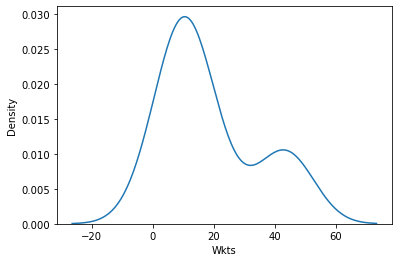

In [162]:
sns.kdeplot(df2['Wkts'])

In [74]:
df2['Average']

0      0.00
1     18.44
2     21.02
3     24.79
4     30.51
5     41.57
6     26.60
7     25.11
8     49.50
9     33.50
10    65.25
11    24.57
12    47.31
13    48.27
14    14.43
15    39.67
Name: Average, dtype: float64

In [81]:
df=pd.DataFrame(df,columns=['Average','Strike Rate','Wkts'])

In [82]:
df

,Average,Strike Rate,Wkts
0,-2.047307,-1.928540,-1.248660
1,-0.864173,-0.529410,-0.643249
2,-0.698637,-0.638426,1.711127
3,-0.456748,-0.383085,1.912930
4,-0.089746,-0.258912,1.240251
5,0.619879,-0.079940,-0.306910
6,-0.340616,-0.529410,-0.575981
7,-0.436217,-0.558559,1.711127
8,1.128678,1.250982,-0.575981
9,0.102097,-0.057204,0.096698


In [85]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
ms=MinMaxScaler()
df=ms.fit_transform(df2[['Average','StrikeRate','Wkts']])
df

array([[0.        , 0.        , 0.        ],
       [0.28260536, 0.33580523, 0.19148936],
       [0.32214559, 0.30964041, 0.93617021],
       [0.37992337, 0.37092486, 1.        ],
       [0.46758621, 0.40072758, 0.78723404],
       [0.63708812, 0.44368266, 0.29787234],
       [0.40766284, 0.33580523, 0.21276596],
       [0.38482759, 0.32880929, 0.93617021],
       [0.75862069, 0.76311739, 0.21276596],
       [0.51340996, 0.4491395 , 0.42553191],
       [1.        , 1.        , 0.17021277],
       [0.37655172, 0.44676088, 0.29787234],
       [0.72505747, 0.76605569, 0.34042553],
       [0.73977011, 0.74786624, 0.23404255],
       [0.22114943, 0.20386176, 0.14893617],
       [0.60796935, 0.50370785, 0.12765957]])

In [104]:
df=pd.DataFrame(df,columns=['Average','Strike Rate','Wkts'])
df.round(2)

,Average,Strike Rate,Wkts
0,0.00,0.00,0.00
1,0.28,0.34,0.19
2,0.32,0.31,0.94
3,0.38,0.37,1.00
4,0.47,0.40,0.79
5,0.64,0.44,0.30
6,0.41,0.34,0.21
7,0.38,0.33,0.94
8,0.76,0.76,0.21
9,0.51,0.45,0.43


<AxesSubplot:xlabel='StrikeRate', ylabel='Density'>

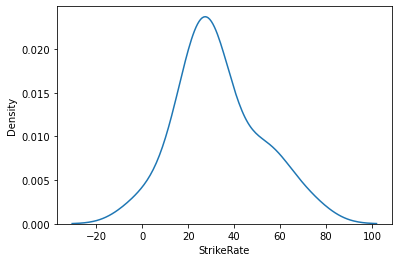

In [116]:

sns.kdeplot(df2['StrikeRate'])

In [112]:
df2

,Wkts,Mdns,Ground,Average,StrikeRate,Player
0,0,0,2015,0.00,0.00,Yuzvendra Chahal
1,9,4,2016,18.44,24.00,Yuzvendra Chahal
2,44,6,2017,21.02,22.13,Yuzvendra Chahal
3,47,3,2018,24.79,26.51,Yuzvendra Chahal
4,37,0,2019,30.51,28.64,Yuzvendra Chahal
5,14,1,2020,41.57,31.71,Yuzvendra Chahal
6,10,1,2021,26.60,24.00,Yuzvendra Chahal
7,44,0,2022,25.11,23.50,Yuzvendra Chahal
8,10,0,2015,49.50,54.54,Ravindra Jadeja
9,20,1,2016,33.50,32.10,Ravindra Jadeja


# yearwise Data of all the format

In [16]:
df2=pd.read_csv('Jasprit.csv')

In [17]:
df3=pd.read_csv('Shami.csv')

In [18]:
df10=pd.concat([df2,df3],axis=0,ignore_index=True)

In [19]:
df10

,Unnamed: 0,Date,Overs,Mdns,Wkts,Econ,Conceeded,Average,strike rate,Inns
0,0,2015,0.0,0,0,0.00,0,0.00,0.00,0
1,1,2016,147.2,8,45,5.72,776,17.24,19.63,29
2,2,2017,233.6,13,51,5.62,1264,24.78,27.48,34
3,3,2018,510.1,99,78,3.86,1591,20.40,39.24,39
4,4,2019,212.6,30,42,4.03,845,20.12,30.37,22
5,5,2020,243.8,36,27,4.84,1027,38.04,54.18,24
6,6,2021,326.0,79,37,3.29,891,24.08,52.86,21
7,7,2022,214.5,41,39,4.47,778,19.95,33.00,20
8,0,2015,116.4,10,25,4.77,537,21.48,27.94,12
9,1,2016,277.1,52,32,3.69,858,26.81,51.96,21


In [20]:
df10['Player']=['Jasprit Bumrah','Jasprit Bumrah','Jasprit Bumrah','Jasprit Bumrah','Jasprit Bumrah','Jasprit Bumrah','Jasprit Bumrah','Jasprit Bumrah','Mohammed Shami','Mohammed Shami','Mohammed Shami','Mohammed Shami','Mohammed Shami','Mohammed Shami','Mohammed Shami','Mohammed Shami']
df10=df10[['Date','Average','Wkts','Player']]
df10.to_csv('Manova2.csv')

In [21]:

df10

,Date,Average,Wkts,Player
0,2015,0.00,0,Jasprit Bumrah
1,2016,17.24,45,Jasprit Bumrah
2,2017,24.78,51,Jasprit Bumrah
3,2018,20.40,78,Jasprit Bumrah
4,2019,20.12,42,Jasprit Bumrah
5,2020,38.04,27,Jasprit Bumrah
6,2021,24.08,37,Jasprit Bumrah
7,2022,19.95,39,Jasprit Bumrah
8,2015,21.48,25,Mohammed Shami
9,2016,26.81,32,Mohammed Shami


In [152]:
from statsmodels.multivariate.manova import MANOVA
fit = MANOVA.from_formula('Wkts+Average ~ Player', data=df10)
print(fit.mv_test())

                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.1665 2.0000 13.0000 32.5360 0.0000
         Pillai's trace 0.8335 2.0000 13.0000 32.5360 0.0000
 Hotelling-Lawley trace 5.0055 2.0000 13.0000 32.5360 0.0000
    Roy's greatest root 5.0055 2.0000 13.0000 32.5360 0.0000
------------------------------------------------------------
                                                            
------------------------------------------------------------
         Player         Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.8408 2.0000 13.0000  1.2306 0.3240
         Pillai's trace 0.1592 2.0000 13.0000  1.2306 0.3240
 Hotelling-Lawley trace 0.1893 2.0000 13.0